In [ ]:
!pip install kmodes

In [ ]:
!pip install dython

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 15.2 MB/s eta 0:00:00


In [ ]:
!pip install adjustText

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.compose import ColumnTransformer
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from dython.nominal import associations
from torchmetrics.functional.nominal import theils_u_matrix
from joblib import Parallel, delayed
import torch
import seaborn as sns
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from adjustText import adjust_text


In [ ]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
train = train.drop(['Unnamed: 0', 'id'], axis=1)
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
test = test.drop(['Unnamed: 0', 'id'], axis=1)
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
train.columns[train.isna().any()].tolist()

['Arrival Delay in Minutes']

In [ ]:
test.columns[test.isna().any()].tolist()

['Arrival Delay in Minutes']

In [ ]:
def detect_outliers(column):
    threshold = 3
    z_score = (column-column.mean())/column.std()
    return(abs(z_score)>threshold).any()

In [ ]:
numeric_cols_impute = ['Arrival Delay in Minutes']
bool_train_outliers = train[numeric_cols_impute].apply(lambda x: detect_outliers(x.dropna()))
bool_test_outliers = test[numeric_cols_impute].apply(lambda x: detect_outliers(x.dropna()))


In [ ]:
print(f"Train_outliers: \n {bool_train_outliers}")
print(f"Test_outliers:  \n {bool_test_outliers}")

Train_outliers: 
 Arrival Delay in Minutes    True
dtype: bool
Test_outliers:  
 Arrival Delay in Minutes    True
dtype: bool


In [ ]:
train[numeric_cols_impute] = train[numeric_cols_impute].apply(lambda x: x.fillna(x.median()))
test[numeric_cols_impute]= test[numeric_cols_impute].apply(lambda x: x.fillna(x.median()))

In [ ]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
columns_of_interest = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

unique_levels = {}

# Iterate through each column of interest and get unique levels
for column in columns_of_interest:
    if column in train.columns:
        unique_levels[column] = train[column].unique()

# Display the unique levels for each column
for column, levels in unique_levels.items():
    print(f"Unique levels for '{column}': {levels}")

Unique levels for 'Inflight wifi service': [3 2 4 1 5 0]
Unique levels for 'Departure/Arrival time convenient': [4 2 5 3 1 0]
Unique levels for 'Ease of Online booking': [3 2 5 4 1 0]
Unique levels for 'Gate location': [1 3 2 5 4 0]
Unique levels for 'Food and drink': [5 1 2 4 3 0]
Unique levels for 'Online boarding': [3 5 2 1 4 0]
Unique levels for 'Seat comfort': [5 1 2 3 4 0]
Unique levels for 'Inflight entertainment': [5 1 2 3 4 0]
Unique levels for 'On-board service': [4 1 2 3 5 0]
Unique levels for 'Leg room service': [3 5 4 2 1 0]
Unique levels for 'Baggage handling': [4 3 5 1 2]
Unique levels for 'Checkin service': [4 1 3 5 2 0]
Unique levels for 'Inflight service': [5 4 3 1 2 0]
Unique levels for 'Cleanliness': [5 1 2 3 4 0]


In [ ]:
unique_levels = {}

# Iterate through each column of interest and get unique levels
for column in columns_of_interest:
    if column in train.columns:
        unique_levels[column] = test[column].unique()

# Display the unique levels for each column
for column, levels in unique_levels.items():
    print(f"Unique levels for '{column}': {levels}")

Unique levels for 'Inflight wifi service': [5 1 2 0 3 4]
Unique levels for 'Departure/Arrival time convenient': [4 1 0 3 5 2]
Unique levels for 'Ease of Online booking': [3 2 0 4 5 1]
Unique levels for 'Gate location': [4 1 2 3 5]
Unique levels for 'Food and drink': [3 5 2 4 1 0]
Unique levels for 'Online boarding': [4 2 1 5 3 0]
Unique levels for 'Seat comfort': [3 5 2 4 1]
Unique levels for 'Inflight entertainment': [5 4 2 1 3 0]
Unique levels for 'On-board service': [5 4 1 2 3 0]
Unique levels for 'Leg room service': [5 4 1 2 3 0]
Unique levels for 'Baggage handling': [5 4 3 1 2]
Unique levels for 'Checkin service': [2 3 4 1 5]
Unique levels for 'Inflight service': [5 4 2 1 3 0]
Unique levels for 'Cleanliness': [5 2 4 3 1 0]


In [ ]:
numeric_columns = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
ordinal_columns = ['Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness']
nominal_columns = ['Gender','Customer Type','Type of Travel','Class']


In [ ]:
len(numeric_columns)+len(ordinal_columns)+len(nominal_columns)

22

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train['satisfaction'])
y_test = label_encoder.fit_transform(test['satisfaction'])

In [ ]:
ordinal_transformer = OrdinalEncoder()
nominal_transformer = OneHotEncoder(sparse_output=False, drop='first')

preprocessor= ColumnTransformer(
    transformers=[
        ('numeric','passthrough',numeric_columns),
        ('ordinal',ordinal_transformer,ordinal_columns),
        ('nominal',nominal_transformer,nominal_columns)
    ]
)
pipeline = Pipeline(steps=[('preprocessor',preprocessor)])
X_train = pipeline.fit_transform(train)
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

feature_names_adjusted=[name.split('__',1)[-1] for name in feature_names]

X_train = pd.DataFrame(X_train,columns=feature_names_adjusted)
X_train.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13.0,460.0,25.0,18.0,3.0,4.0,3.0,1.0,5.0,3.0,...,3.0,3.0,4.0,5.0,5.0,1.0,0.0,1.0,0.0,1.0
1,25.0,235.0,1.0,6.0,3.0,2.0,3.0,3.0,1.0,3.0,...,5.0,2.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0
2,26.0,1142.0,0.0,0.0,2.0,2.0,2.0,2.0,5.0,5.0,...,3.0,3.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0
3,25.0,562.0,11.0,9.0,2.0,5.0,5.0,5.0,2.0,2.0,...,5.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
4,61.0,214.0,0.0,0.0,3.0,3.0,3.0,3.0,4.0,5.0,...,4.0,3.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
train['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [ ]:
scaler = StandardScaler()
X_train_numeric_scaled= scaler.fit_transform(X_train[numeric_columns])
X_train_scaled = pd.DataFrame(X_train_numeric_scaled, columns = numeric_columns)
X_train_scaled = pd.concat([X_train_scaled,X_train.drop(numeric_columns, axis=1)],axis=1)
X_train_scaled.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,-1.745279,-0.731539,0.266393,0.074169,3.0,4.0,3.0,1.0,5.0,3.0,...,3.0,3.0,4.0,5.0,5.0,1.0,0.0,1.0,0.0,1.0
1,-0.951360,-0.957184,-0.361375,-0.236313,3.0,2.0,3.0,3.0,1.0,3.0,...,5.0,2.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0
2,-0.885200,-0.047584,-0.387532,-0.391554,2.0,2.0,2.0,2.0,5.0,5.0,...,3.0,3.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0
3,-0.951360,-0.629246,-0.099805,-0.158692,2.0,5.0,5.0,5.0,2.0,2.0,...,5.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
4,1.430397,-0.978244,-0.387532,-0.391554,3.0,3.0,3.0,3.0,4.0,5.0,...,4.0,3.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_train['Flight Distance'].median()

843.0

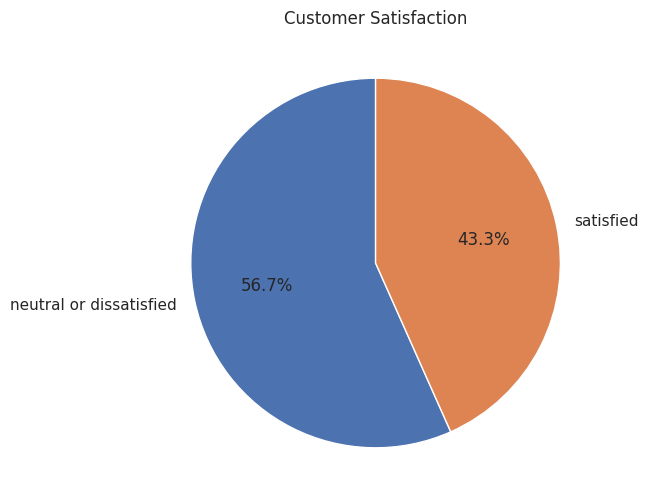

In [ ]:

plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
satisfaction_counts = train['satisfaction'].value_counts()
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Satisfaction')
plt.show()


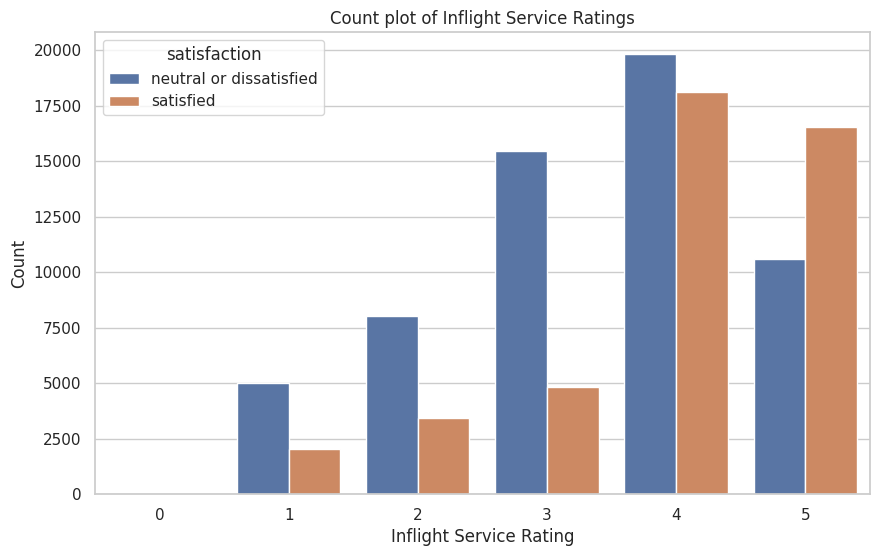

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Inflight service',hue = 'satisfaction', data=train)
plt.title('Count plot of Inflight Service Ratings')
plt.xlabel('Inflight Service Rating')
plt.ylabel('Count')
plt.show()

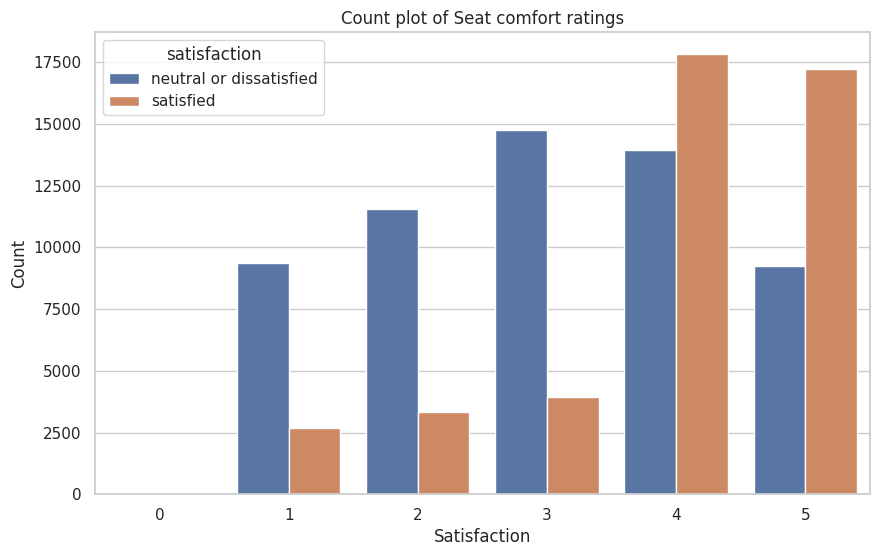

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Seat comfort', hue='satisfaction', data=train)
plt.title('Count plot of Seat comfort ratings')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

In [ ]:
ct = pd.crosstab(train['Class'], train['satisfaction'], normalize='index')

In [ ]:
ct

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,0.305749,0.694251
Eco,0.813862,0.186138
Eco Plus,0.753936,0.246064


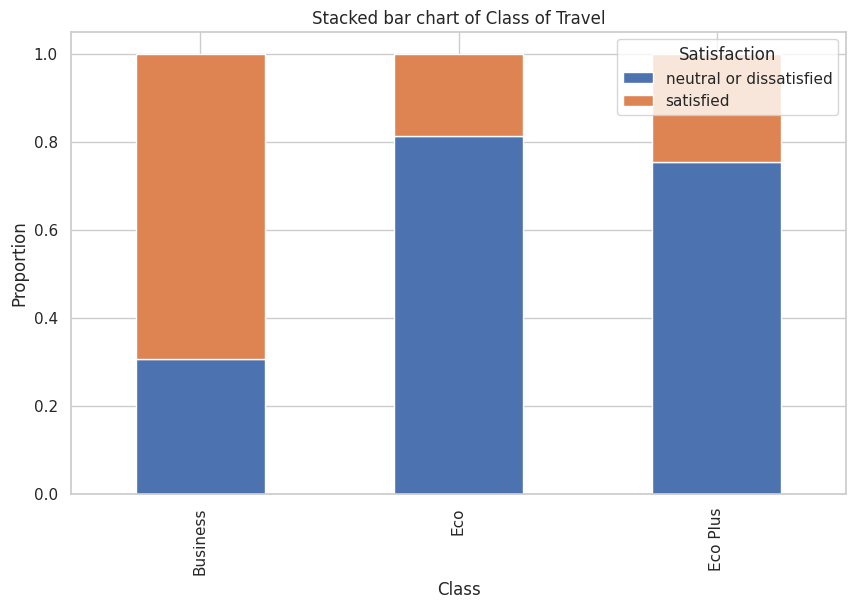

In [ ]:
ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked bar chart of Class of Travel')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.legend(title='Satisfaction')
plt.show()

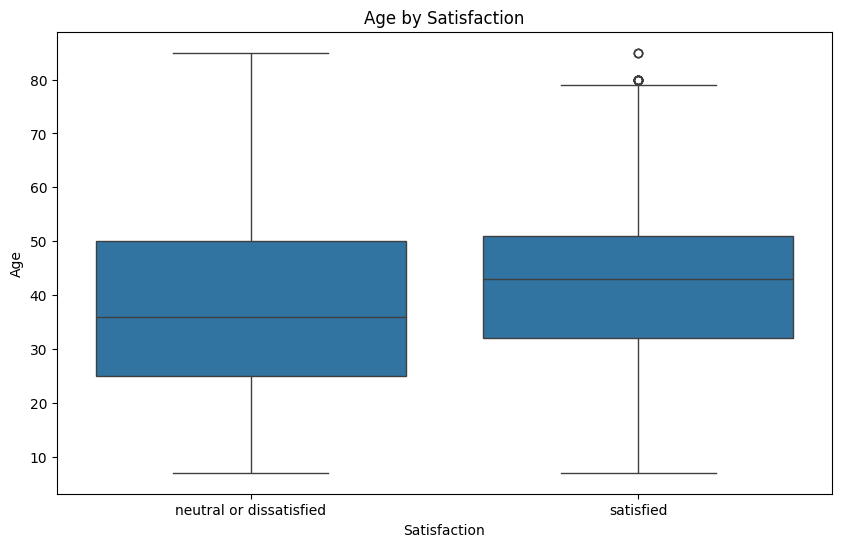

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Age', data=train)

plt.title('Age by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()


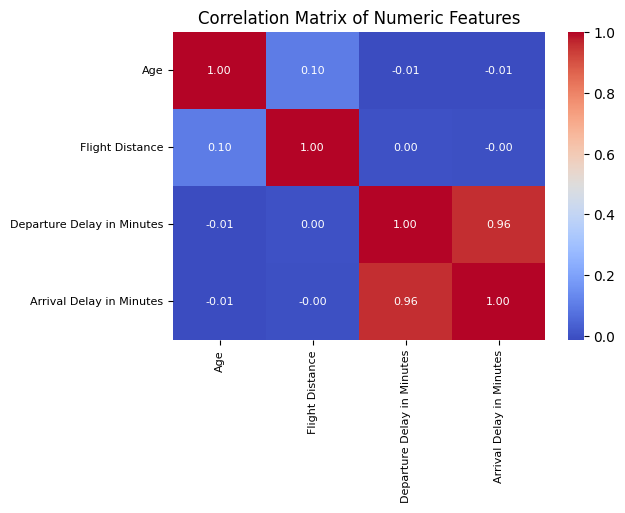

In [ ]:
plt.figure(figsize=(6, 4))
correlation_matrix = train[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={"size": 8})
plt.title('Correlation Matrix of Numeric Features')
plt.xticks(fontsize=8)  # Adjust x-axis label font size
plt.yticks(fontsize=8)
plt.show()


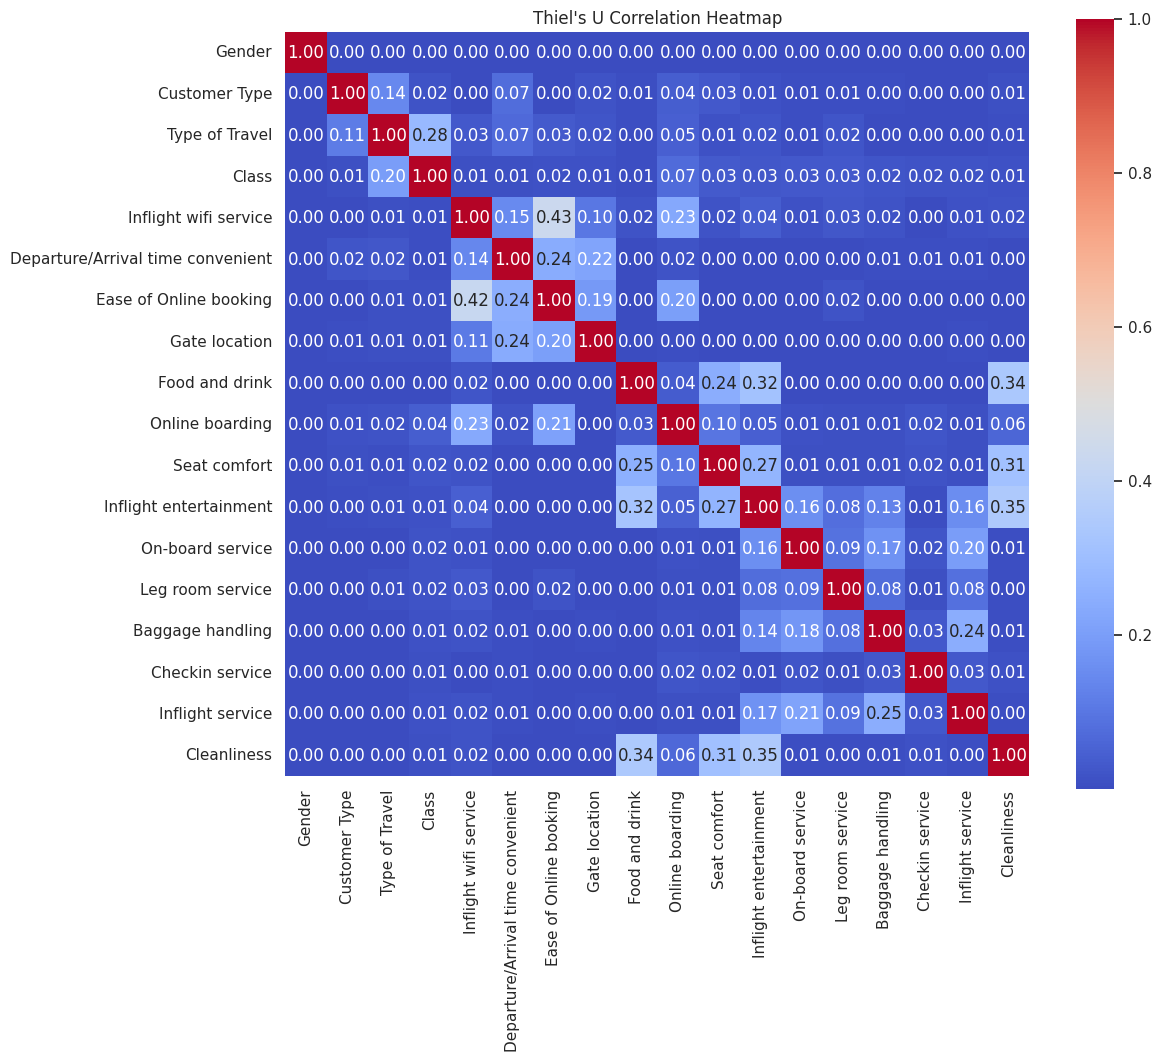

In [ ]:
categoric_columns= nominal_columns+ordinal_columns
data_tensor = torch.tensor(train[categoric_columns].apply(lambda x: pd.factorize(x)[0]).values)
theils_u_results = theils_u_matrix(data_tensor)
theils_u_df = pd.DataFrame(theils_u_results.numpy(),
                            index=categoric_columns,
                            columns=categoric_columns)
plt.figure(figsize=(12, 10))
sns.heatmap(theils_u_df, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Thiel's U Correlation Heatmap")
plt.show()

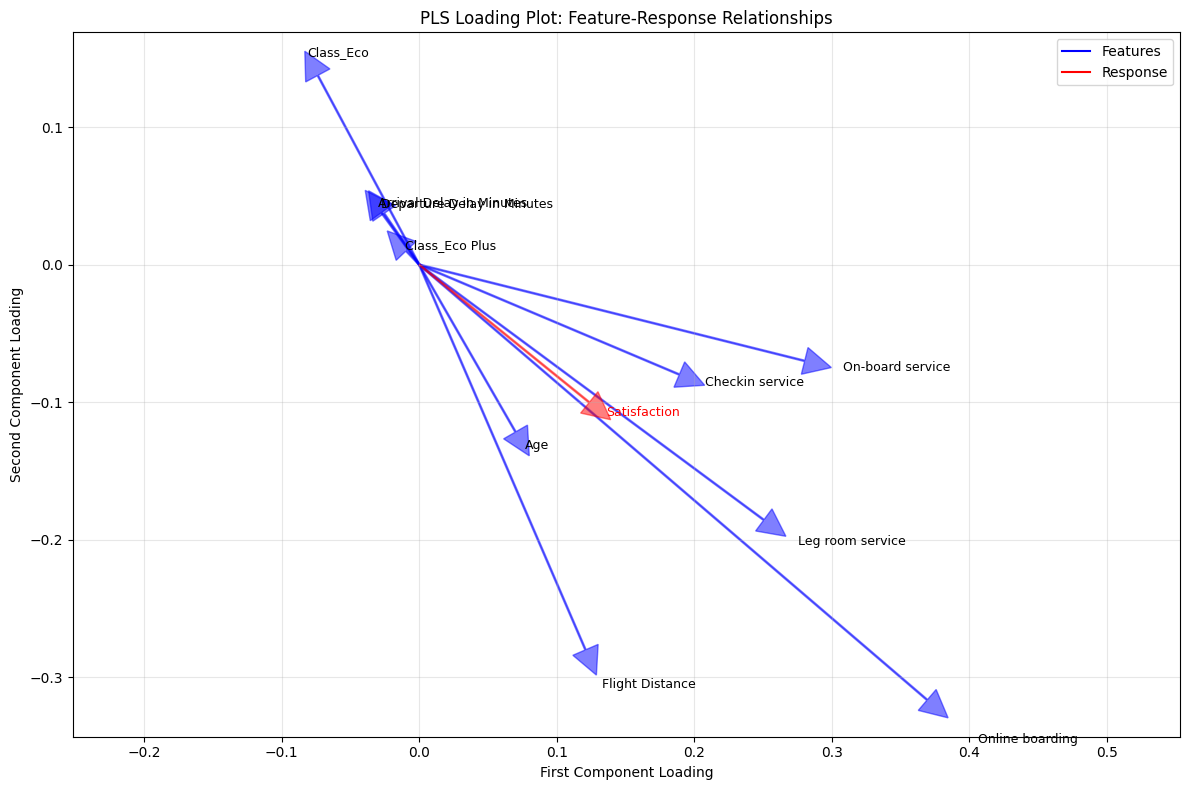


Correlations between features and satisfaction based on loading vectors:
                   Feature  Correlation
           Online boarding     0.999612
          Leg room service     0.999073
            Class_Eco Plus    -0.991329
  Arrival Delay in Minutes    -0.965872
           Checkin service     0.960773
Departure Delay in Minutes    -0.958377
                       Age     0.933097
                 Class_Eco    -0.921772
          On-board service     0.906421
           Flight Distance     0.885732

Angles between feature and response loading vectors:
Online boarding: 1.6 degrees
Leg room service: 2.5 degrees
Class_Eco Plus: 172.4 degrees
Arrival Delay in Minutes: 165.0 degrees
Checkin service: 16.1 degrees
Departure Delay in Minutes: 163.4 degrees
Age: 21.1 degrees
Class_Eco: 157.2 degrees
On-board service: 25.0 degrees
Flight Distance: 27.7 degrees


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n_components = 10
pls = PLSRegression(n_components=n_components, scale=False)
pls.fit(X_train_scaled, y_train)


X_loadings = pls.x_loadings_
Y_loadings = pls.y_loadings_


correlations = []
for i in range(X_loadings.shape[0]):

    feature_loading = X_loadings[i, :2]

    response_loading = Y_loadings[:, :2].flatten()


    correlation = np.dot(feature_loading, response_loading) / (
        np.linalg.norm(feature_loading) * np.linalg.norm(response_loading)
    )
    correlations.append(correlation)


if hasattr(X_train_scaled, 'columns'):
    feature_names = X_train_scaled.columns.tolist()
else:
    feature_names = [f'Feature_{i}' for i in range(len(correlations))]

corr_df = pd.DataFrame({
    'Feature': feature_names,
    'Correlation': correlations,
    'Loading_1': X_loadings[:, 0],
    'Loading_2': X_loadings[:, 1]
})


corr_df['Abs_Correlation'] = np.abs(corr_df['Correlation'])
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)


top_n = 10
top_features = corr_df.head(top_n)

plt.figure(figsize=(12, 8))


for idx, row in top_features.iterrows():
    plt.arrow(0, 0, row['Loading_1'], row['Loading_2'],
              head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.5)
    plt.text(row['Loading_1']*1.1, row['Loading_2']*1.1,
             row['Feature'], fontsize=9)


response_vector = Y_loadings[:, :2].flatten()
plt.arrow(0, 0, response_vector[0], response_vector[1],
          head_width=0.02, head_length=0.02, fc='red', ec='red', alpha=0.5)
plt.text(response_vector[0]*1.1, response_vector[1]*1.1,
         'Satisfaction', color='red', fontsize=9)


circle = plt.Circle((0,0), 1, fill=False, linestyle='--', alpha=0.3)
plt.gca().add_artist(circle)


plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.xlabel('First Component Loading')
plt.ylabel('Second Component Loading')
plt.title('PLS Loading Plot: Feature-Response Relationships')


plt.plot([], [], 'b-', label='Features')
plt.plot([], [], 'r-', label='Response')
plt.legend()


plt.tight_layout()

# Show plot
plt.show()

# Print correlations for top features
print("\nCorrelations between features and satisfaction based on loading vectors:")
print(top_features[['Feature', 'Correlation']].to_string(index=False))

# Calculate and print angles for top features
print("\nAngles between feature and response loading vectors:")
for idx, row in top_features.iterrows():
    feature_loading = np.array([row['Loading_1'], row['Loading_2']])
    angle = np.arccos(row['Correlation']) * 180 / np.pi
    print(f"{row['Feature']}: {angle:.1f} degrees")

Cluster Analysis

In [ ]:
ordinal_encoded_columns = preprocessor.named_transformers_['ordinal'].get_feature_names_out()
ordinal_encoded_indices = [X_train.columns.get_loc(col) for col in ordinal_encoded_columns]
ordinal_encoded_indices

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [ ]:
nominal_encoded_columns= preprocessor.named_transformers_['nominal'].get_feature_names_out()
nominal_encoded_indices =[X_train.columns.get_loc(col) for col in nominal_encoded_columns]
nominal_encoded_indices

[18, 19, 20, 21, 22]

In [ ]:
categorical_indices = ordinal_encoded_indices+nominal_encoded_indices

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 12149, ncost: 930256.3270890027
Run: 1, iteration: 2/10, moves: 7192, ncost: 927353.8156899282
Run: 1, iteration: 3/10, moves: 6402, ncost: 925169.997105015
Run: 1, iteration: 4/10, moves: 4381, ncost: 924237.1504000298
Run: 1, iteration: 5/10, moves: 2249, ncost: 924008.4124898243
Run: 1, iteration: 6/10, moves: 1057, ncost: 923957.868394758
Run: 1, iteration: 7/10, moves: 430, ncost: 923949.9469338362
Run: 1, iteration: 8/10, moves: 177, ncost: 923948.577801131
Run: 1, iteration: 9/10, moves: 51, ncost: 923948.4548522484
Run: 1, iteration: 10/10, moves: 13, ncost: 923948.4452646424
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 18092, ncost: 871064.0458684127
R

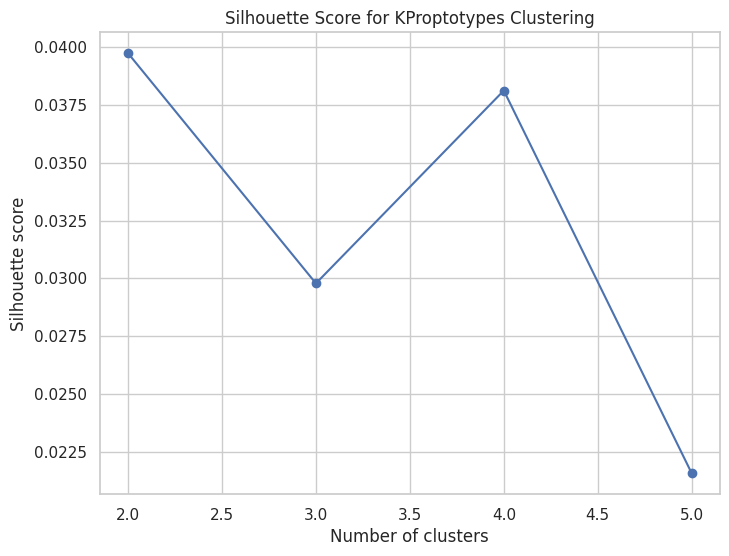

In [ ]:
range_n_clusters = [2,3,4,5]
silhouette_scores = []
for n_clusters in range_n_clusters:
  kproto = KPrototypes(n_clusters= n_clusters,init='Cao',n_init=1,verbose=1,max_iter=10)  # n_init=2 max_iter=20  optimal clusters=3
  cluster_labels_kproto = kproto.fit_predict(X_train_scaled.values,categorical = categorical_indices)

  silhouette_avg = silhouette_score(X_train_scaled, cluster_labels_kproto)
  silhouette_scores.append(silhouette_avg)

plt.figure(figsize =(8,6))
plt.plot(range_n_clusters,silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for KProptotypes Clustering')
plt.grid(True)
plt.show()